In [1]:
import os
import pandas as pd
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.pyplot as plt
from make_benchmarks import *
from h2h_helper import *

Combine cafa3_1 and cafa3_2 results, and cafa2_1 and cafa2_1 results

In [2]:
eval_path = '/data/rashika/CAFA4/head2head/collected_eval/'

# Cafa2 paths
cafa2_1_path = eval_path + 'eval_cafa2_1/'
cafa2_2_path = eval_path + 'eval_cafa2_2/'
eval_cafa2 = eval_path + "eval_cafa2/"

# Cafa3 paths
cafa3_1_path = eval_path + 'eval_cafa3_1/'
cafa3_2_path = eval_path + 'eval_cafa3_2/'
eval_cafa3 = eval_path + "eval_cafa3/"

In [4]:
# Combine CAFA2_1 and CAFA2_2 results
#combine_results([cafa2_1_path, cafa2_2_path], eval_cafa2, add_result_path = False)

# Combine CAFA3_1 and CAFA3_2 results
#combine_results([cafa3_1_path, cafa3_2_path], eval_cafa3, add_result_path = False)

Combine CAFA2, CAFA3, CAFA4 results

In [5]:
eval_cafa4 = eval_path + "eval_cafa4/"
combined_results = eval_path + "combined_results/"
#combine_results([eval_cafa2, eval_cafa3, eval_cafa4], combined_results, add_result_path = True)

### Distribution of f_max_micro and S_min for each CAFA

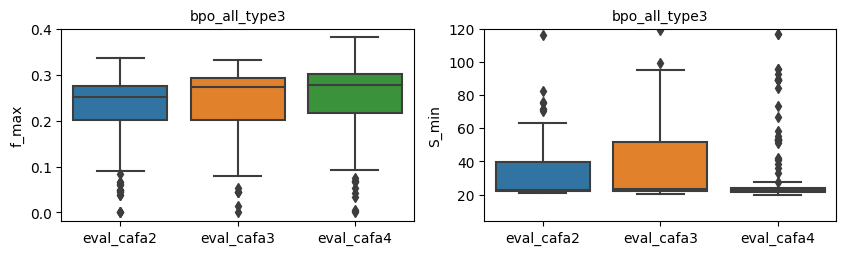

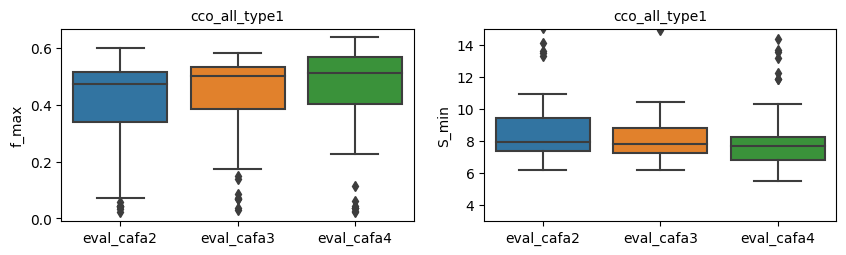

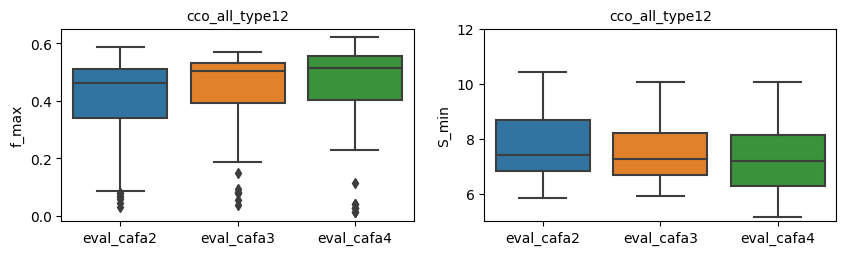

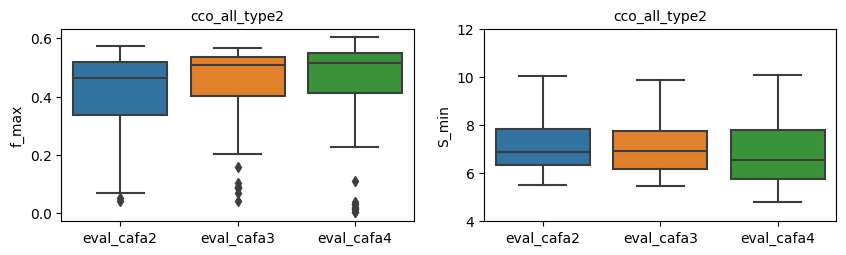

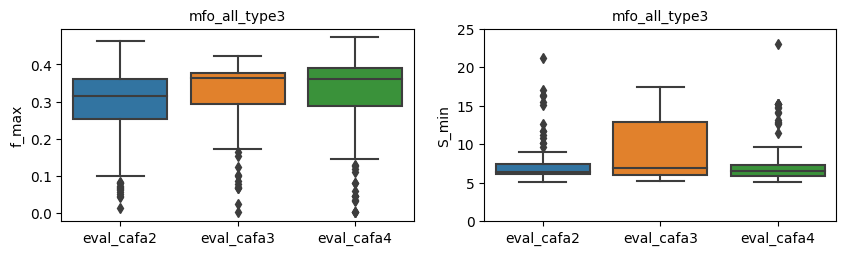

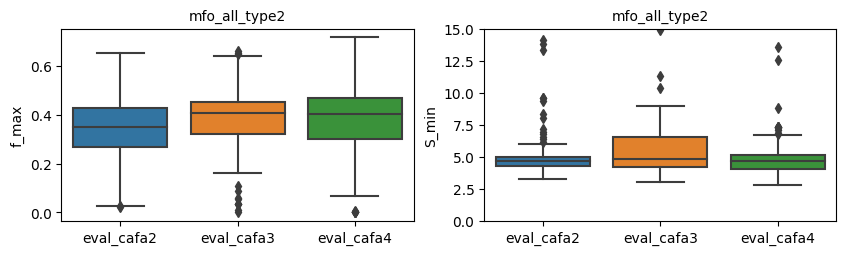

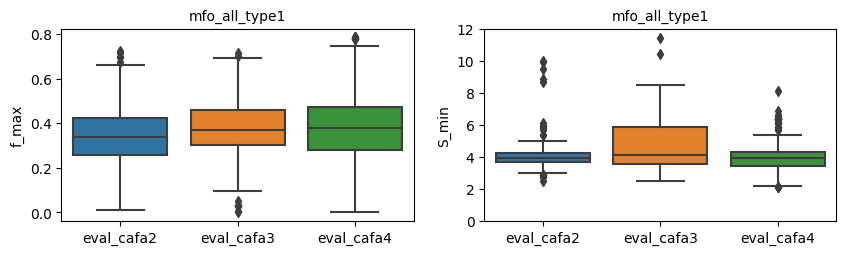

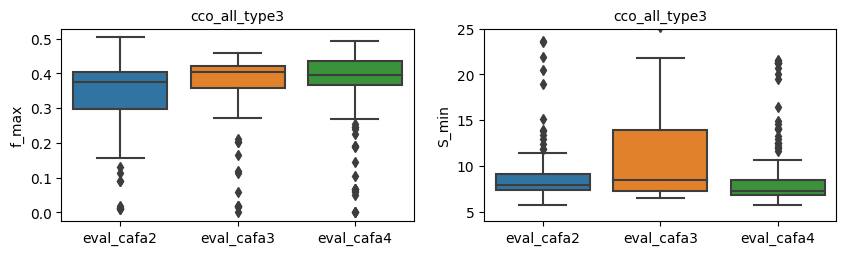

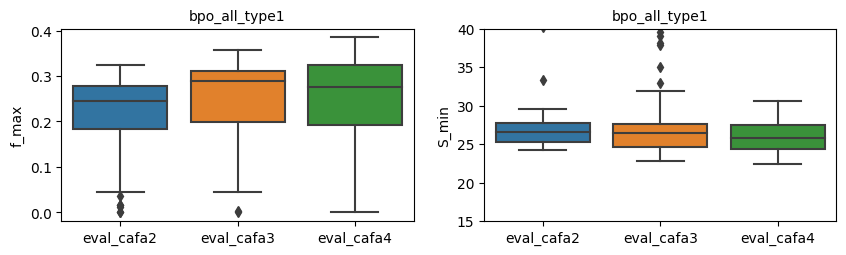

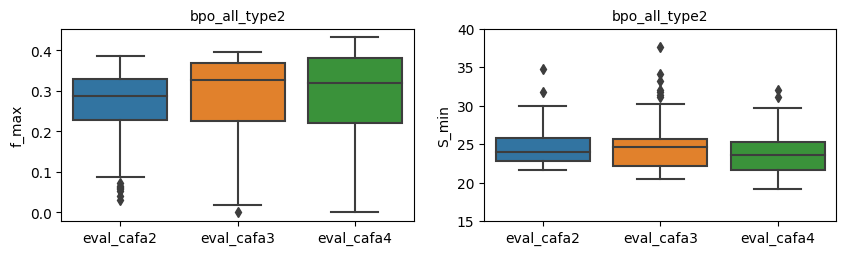

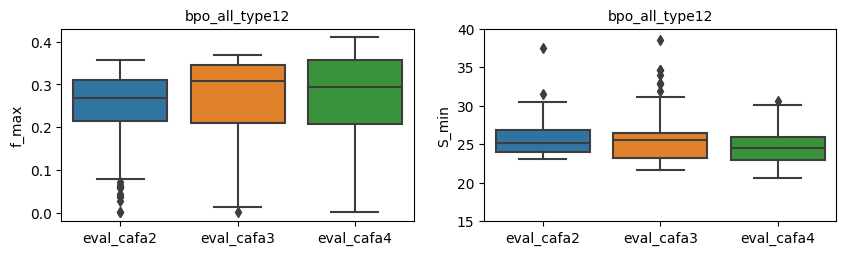

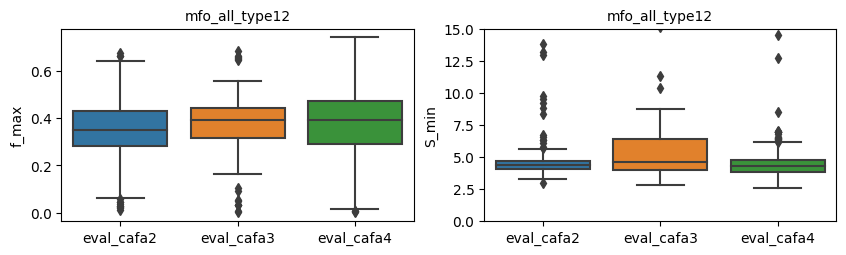

In [6]:
## Manually observe the y_limits for S_min distributions
S_min_y_lim = {}
S_min_y_lim['bpo_all_type1'] = [15, 40]
S_min_y_lim['bpo_all_type2'] = [15, 40]
S_min_y_lim['bpo_all_type3'] = [4, 120]
S_min_y_lim['bpo_all_type12'] = [15, 40]
S_min_y_lim['cco_all_type1'] = [3, 15]
S_min_y_lim['cco_all_type2'] = [4, 12]
S_min_y_lim['cco_all_type3'] = [4, 25]
S_min_y_lim['cco_all_type12'] = [5, 12]
S_min_y_lim['mfo_all_type1'] = [0, 12]
S_min_y_lim['mfo_all_type2'] = [0, 15]
S_min_y_lim['mfo_all_type3'] = [0, 25]
S_min_y_lim['mfo_all_type12'] = [0, 15]

benchmarks = os.listdir(combined_results)
plots_path = eval_path+ 'combined_plots/'
f_micro_dfs = []
S_min_dfs = []
for bm in benchmarks:
    f_micro_df = pd.read_csv(combined_results + bm + "/evaluation_best_f_micro.tsv", sep = "\t", header = 0)
    f_micro_df['benchmark'] = bm
    f_micro_df['type'] = bm.split("_")[-1]
    f_micro_df['aspect'] = bm.split("_")[0]
    f_micro_df["CAFA"] = f_micro_df["cafa"].str.upper() 
    f_micro_dfs.append(f_micro_df)
    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(10, 2.5))  
    

    #plt.figure()
    plot = sns.boxplot(x='Result Path', y='f', data = f_micro_df.loc[:, ["f", "Result Path"]], ax=axes[0])
    axes[0].set_title(bm, fontsize=10)
    axes[0].set_ylabel("f_max", fontsize=10)
    axes[0].set_xlabel("", fontsize=10)
    axes[0].tick_params(axis='x', labelsize=10)
    axes[0].tick_params(axis='y', labelsize=10)
    
    S_min_df = pd.read_csv(combined_results + bm + "/evaluation_best_s.tsv", sep = "\t", header = 0)
    S_min_df['benchmark'] = bm
    S_min_df['type'] = bm.split("_")[-1]
    S_min_df['aspect'] = bm.split("_")[0]
    S_min_df["CAFA"] = S_min_df["cafa"].str.upper() 
    S_min_dfs.append(S_min_df)
    plot = sns.boxplot(x='Result Path', y='s', data = S_min_df.loc[:, ["s", "Result Path"]], ax=axes[1])
    axes[1].set_title(bm, fontsize=6)
    axes[1].set_ylabel("S_min", fontsize=10)
    axes[1].set_xlabel("", fontsize=10)
    axes[1].set_ylim(S_min_y_lim[bm])
    axes[1].set_title(bm, fontsize=10)
    axes[1].tick_params(axis='x', labelsize=10)
    axes[1].tick_params(axis='y', labelsize=10)
    plt.savefig('/data/rashika/CAFA4/head2head/collected_eval/combined_plots/field/' + bm+'.png')

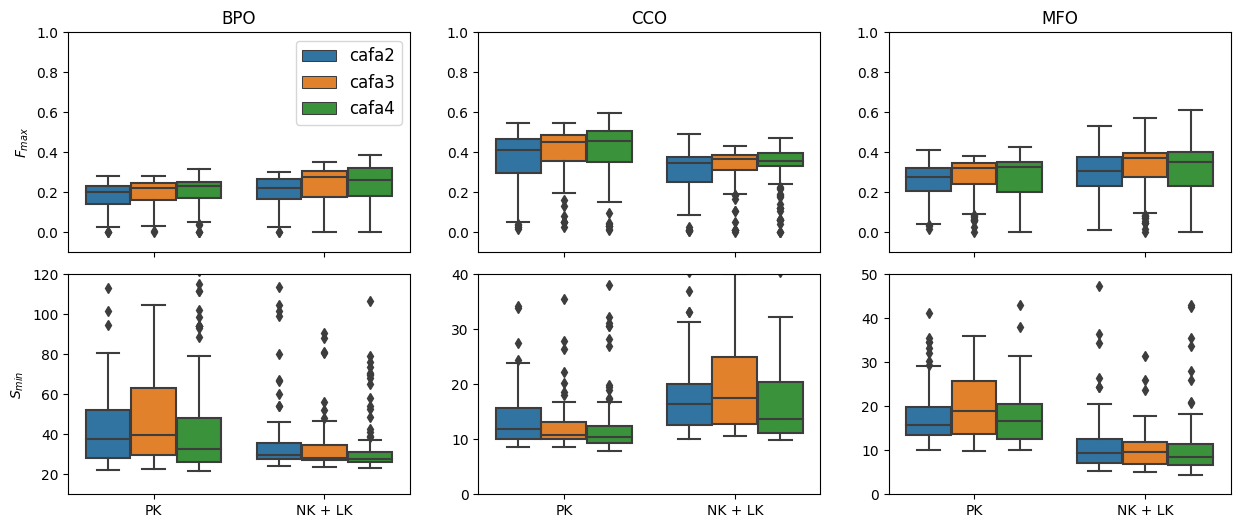

<Figure size 1000x600 with 0 Axes>

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(15, 6), gridspec_kw={'hspace': 0.1})  

f_micro_DF = pd.concat(f_micro_dfs, axis = 0)
S_min_DF = pd.concat(S_min_dfs, axis = 0)

plt.figure(figsize=(10, 6))
plot = sns.boxplot(data=f_micro_DF[((f_micro_DF["type"] == "type12") | (f_micro_DF["type"] == "type3")) & (f_micro_DF["aspect"] == "bpo")], y='f_micro', x='type', hue='cafa', ax=axes[0,0])
axes[0,0].set_ylim([-0.1, 1])
axes[0,0].set_xlabel("")
axes[0,0].set_ylabel("$F_{max}$")
axes[0,0].legend(title='', fontsize = 12)
axes[0,0].set_title("BPO")
axes[0,0].set_xticks(ticks=[0, 1])
#axes[0,0].set_xticklabels(['PK', 'NK + LK'])
axes[0,0].set_xticklabels(['', ''])

plot = sns.boxplot(data=f_micro_DF[((f_micro_DF["type"] == "type12") | (f_micro_DF["type"] == "type3")) & (f_micro_DF["aspect"] == "cco")], y='f_micro', x='type', hue='cafa', ax=axes[0,1])
axes[0,1].set_ylim([-0.1, 1])
axes[0,1].set_xlabel("")
#axes[0,1].set_ylabel("$F_{max}$")
axes[0,1].set_ylabel("")
axes[0,1].legend(title='')
axes[0,1].set_title("CCO")
axes[0,1].legend().remove()
axes[0,1].set_xticks(ticks=[0, 1])
#axes[0,1].set_xticklabels(['PK', 'NK + LK'])
axes[0,1].set_xticklabels(['', ''])

plot = sns.boxplot(data=f_micro_DF[((f_micro_DF["type"] == "type12") | (f_micro_DF["type"] == "type3")) & (f_micro_DF["aspect"] == "mfo")], y='f_micro', x='type', hue='cafa', ax=axes[0,2])
axes[0,2].set_ylim([-0.1, 1])
axes[0,2].set_xlabel("")
#axes[0,2].set_ylabel("$F_{max}$")
axes[0,2].set_ylabel("")
axes[0,2].legend(title='')
axes[0,2].set_title("MFO")
axes[0,2].legend().remove()
axes[0,2].set_xticks(ticks=[0, 1])
#axes[0,2].set_xticklabels(['PK', 'NK + LK'])
axes[0,2].set_xticklabels(['', ''])


plot = sns.boxplot(data=f_micro_DF[((S_min_DF["type"] == "type12") | (S_min_DF["type"] == "type3")) & (S_min_DF["aspect"] == "bpo")], y='s_w', x='type', hue='cafa', ax=axes[1,0])
axes[1,0].set_ylim([10, 120])
axes[1,0].set_xlabel("")
axes[1,0].set_ylabel("$S_{min}$")
axes[1,0].legend(title='')
axes[1,0].legend().remove()
axes[1,0].set_xticks(ticks=[0, 1])
axes[1,0].set_xticklabels(['PK', 'NK + LK'])

plot = sns.boxplot(data=f_micro_DF[((S_min_DF["type"] == "type12") | (S_min_DF["type"] == "type3")) & (S_min_DF["aspect"] == "cco")], y='s_w', x='type', hue='cafa', ax=axes[1,1])
axes[1,1].set_ylim([0, 40])
axes[1,1].set_xlabel("")
#axes[1,1].set_ylabel("$S_{min}$")
axes[1,1].set_ylabel("")
axes[1,1].legend(title='')
axes[1,1].legend().remove()
axes[1,1].set_xticks(ticks=[0, 1])
axes[1,1].set_xticklabels(['PK', 'NK + LK'])

plot = sns.boxplot(data=f_micro_DF[((S_min_DF["type"] == "type12") | (S_min_DF["type"] == "type3")) & (S_min_DF["aspect"] == "mfo")], y='s_w', x='type', hue='cafa', ax=axes[1,2])
axes[1,2].set_ylim([0, 50])
axes[1,2].set_xlabel("")
#axes[1,2].set_ylabel("$S_{min}$")
axes[1,2].set_ylabel("")
axes[1,2].legend(title='')
axes[1,2].legend().remove()
axes[1,2].set_xticks(ticks=[0, 1])
axes[1,2].set_xticklabels(['PK', 'NK + LK'])

plt.tight_layout()
plt.savefig("/data/rashika/CAFA4/head2head/collected_eval/poster_plots/Field.png")
plt.savefig("/data/rashika/CAFA4/head2head/collected_eval/poster_plots/Field.eps", format = 'eps')
plt.show()

In [8]:
pwd

'/home/rashika/CAFA4/stealth_eval/code'

In [9]:
display(f_micro_DF)

,filename,ns,tau,n,tp,fp,fn,pr,rc,cov,...,rc_micro_w,f_micro_w,cov_max,Result Path,cafa,cafa_filename,benchmark,type,aspect,CAFA
0,M001,biological_process,0.35,16970.0,7.882,56.405,15.338,0.204,0.383,0.876,...,0.288,0.144,0.949,eval_cafa2,cafa2,cafa2_M001,bpo_all_type3,type3,bpo,CAFA2
1,M002,biological_process,0.20,17299.0,6.959,29.304,16.260,0.257,0.351,0.893,...,0.241,0.194,0.936,eval_cafa2,cafa2,cafa2_M002,bpo_all_type3,type3,bpo,CAFA2
2,M003,biological_process,0.26,18384.0,5.909,20.407,17.310,0.277,0.299,0.949,...,0.196,0.193,0.949,eval_cafa2,cafa2,cafa2_M003,bpo_all_type3,type3,bpo,CAFA2
3,M004,biological_process,0.01,9.0,0.001,0.005,23.219,0.101,0.000,0.000,...,0.000,0.000,0.000,eval_cafa2,cafa2,cafa2_M004,bpo_all_type3,type3,bpo,CAFA2
4,M005,biological_process,0.29,3.0,0.000,0.001,23.219,0.121,0.000,0.000,...,0.000,0.000,0.000,eval_cafa2,cafa2,cafa2_M005,bpo_all_type3,type3,bpo,CAFA2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,M142,molecular_function,0.93,2547.0,2.284,5.402,2.521,0.360,0.383,0.658,...,0.471,0.329,0.924,eval_cafa4,cafa4,cafa4_M142,mfo_all_type12,type12,mfo,CAFA4
351,M143,molecular_function,0.87,2396.0,0.896,6.465,3.909,0.162,0.258,0.619,...,0.133,0.098,1.000,eval_cafa4,cafa4,cafa4_M143,mfo_all_type12,type12,mfo,CAFA4
352,M144,molecular_function,0.01,2066.0,1.233,4.619,3.571,0.275,0.268,0.534,...,0.215,0.186,0.534,eval_cafa4,cafa4,cafa4_M144,mfo_all_type12,type12,mfo,CAFA4
353,blast,molecular_function,0.60,1439.0,1.575,3.754,3.230,0.353,0.253,0.372,...,0.329,0.270,0.894,eval_cafa4,cafa4,cafa4_blast,mfo_all_type12,type12,mfo,CAFA4


Combine the register files

In [10]:
cafa2_register = eval_path + "cafa2_register.tab"
cafa3_register = eval_path + "cafa3_register.tab"
cafa4_register = eval_path + "cafa4_register.tab"

In [11]:
registers = [cafa2_register, cafa3_register, cafa4_register]
dfs = []
for register in registers:
    df = pd.read_csv(register, sep = "\t", header = 0)
    df.columns = ['#INTERNAL_ID', 'EXTERNAL_ID', 'TEAM_NAME', 'TYPE', 'DISPLAY_NAME',
       'DUMP_NAME', 'PI', 'KEYWORDS', 'COLOR (RGB in HEX)']
    df["CAFA"] = register.split("/")[-1].split("_")[0]
    dfs.append(df)
    
combined_register = pd.concat(dfs, axis = 0)

In [12]:
#combined_register.to_csv(combined_results + "Combined_register.tab", sep = "\t", index = False)

In [13]:
S_min_coord = {}
S_min_coord['bpo_all_type1'] = [[17, 27], [0, 50]]
S_min_coord['bpo_all_type2'] = [[12, 22], [0, 40]]
S_min_coord['bpo_all_type3'] = [[16, 22], [0, 100]]
S_min_coord['bpo_all_type12'] = [[15, 24], [0, 60]]
S_min_coord['cco_all_type1'] = [[7, 10], [0, 20]]
S_min_coord['cco_all_type2'] = [[5, 8], [0, 15]]
S_min_coord['cco_all_type3'] = [[7, 10.5], [0, 15]]
S_min_coord['cco_all_type12'] = [[6, 9], [0, 15]]
S_min_coord['mfo_all_type1'] = [[2, 4.5], [0, 12]]
S_min_coord['mfo_all_type2'] = [[3, 6], [0, 20]]
S_min_coord['mfo_all_type3'] = [[7, 10], [0, 15]]
S_min_coord['mfo_all_type12'] = [[3, 5], [0, 20]]

0.344 0.293
0.375 0.275
0.363 0.242
0.402 0.226
0.356 0.244
0.413 0.222
0.374 0.23
0.355 0.232
0.325 0.244
0.334 0.24
0.328 0.237
0.582 0.628
0.541 0.571
0.521 0.596
0.568 0.538
0.535 0.571
0.542 0.56
0.513 0.583
0.646 0.462
0.608 0.482
0.496 0.573
0.561 0.503
0.574 0.622
0.53 0.578
0.571 0.524
0.519 0.578
0.553 0.539
0.519 0.572
0.564 0.52
0.569 0.505
0.536 0.523
0.574 0.49
0.494 0.564
0.588 0.598
0.545 0.555
0.534 0.557
0.534 0.556
0.556 0.528
0.58 0.505
0.539 0.538
0.574 0.507
0.592 0.493
0.58 0.49
0.539 0.515
0.485 0.384
0.459 0.383
0.441 0.388
0.462 0.369
0.527 0.312
0.362 0.401
0.394 0.369
0.392 0.369
0.58 0.28
0.462 0.31
0.575 0.274
0.604 0.593
0.616 0.523
0.58 0.537
0.535 0.548
0.496 0.528
0.465 0.552
0.608 0.42
0.586 0.423
0.472 0.505
0.507 0.459
0.505 0.444
0.619 0.647
0.644 0.539
0.649 0.534
0.584 0.569
0.571 0.556
0.511 0.629
0.517 0.584
0.476 0.613
0.556 0.496
0.64 0.422
0.571 0.451
0.473 0.506
0.479 0.468
0.431 0.509
0.455 0.44
0.498 0.404
0.506 0.385
0.482 0.393
0.529 0.

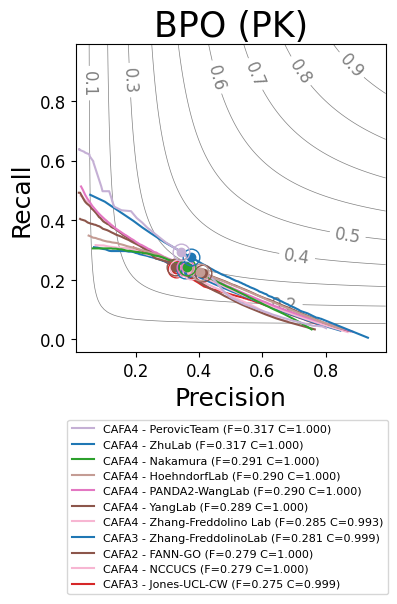

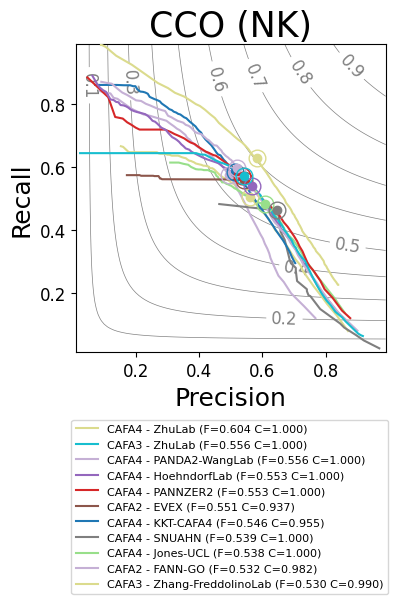

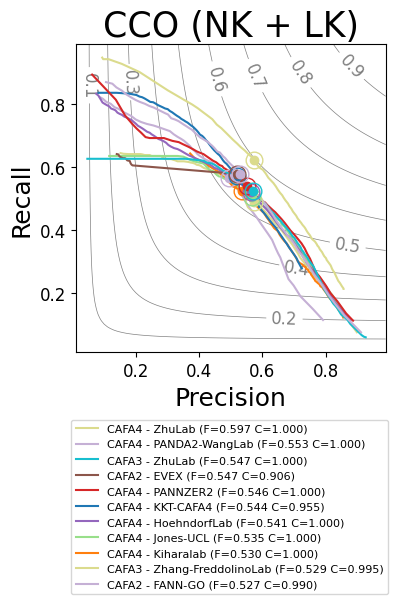

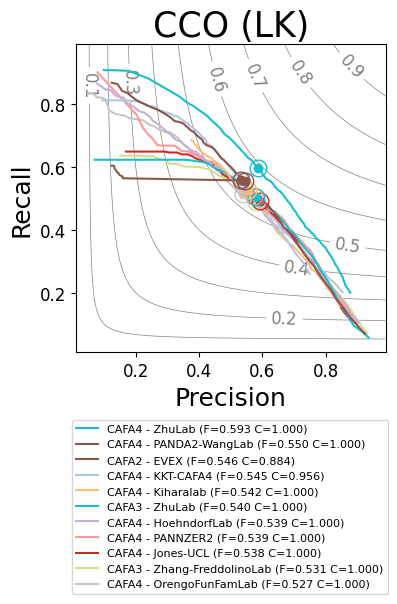

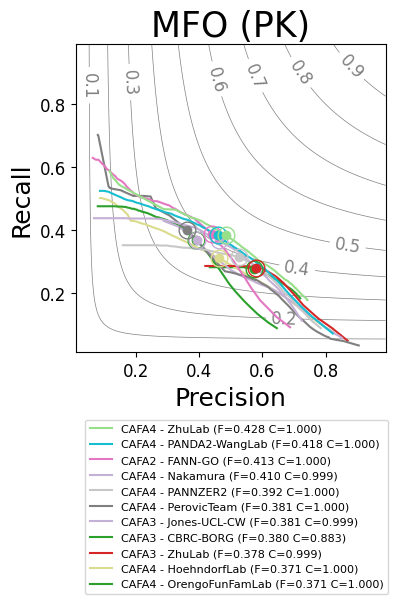

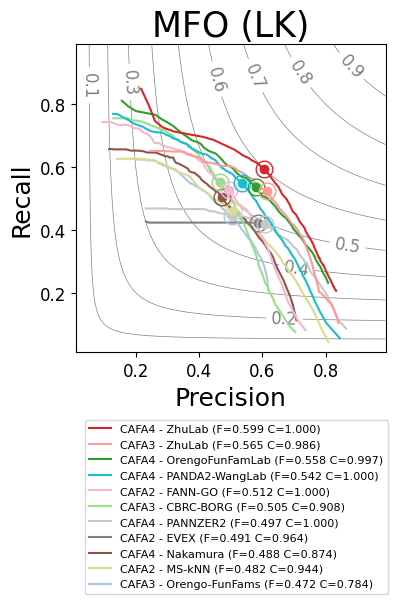

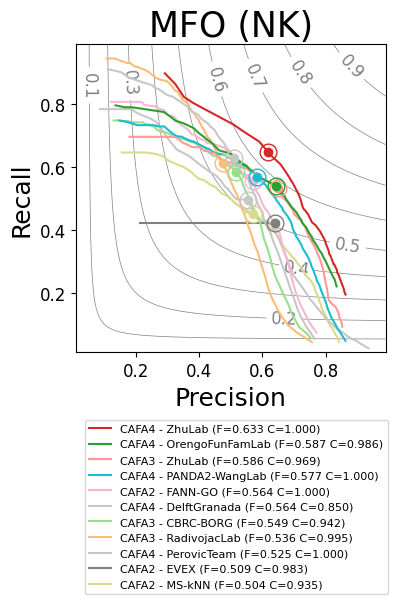

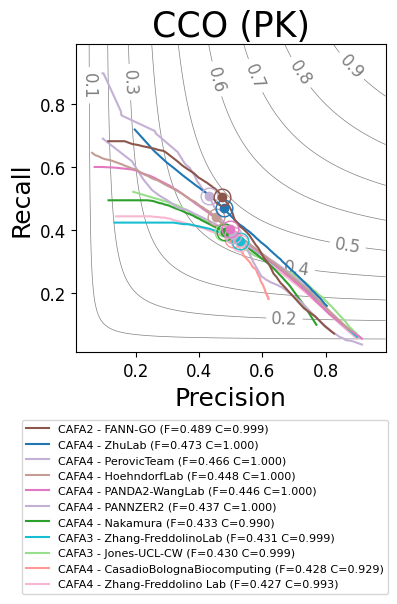

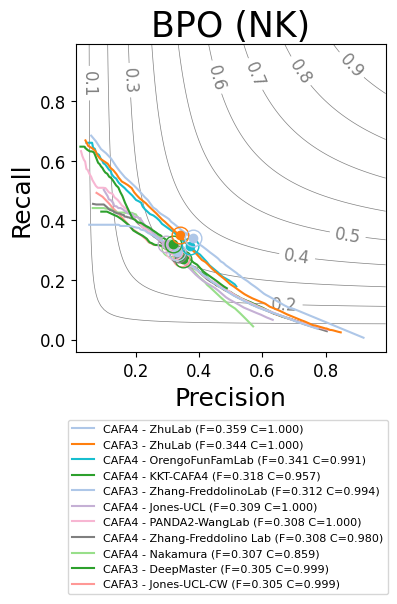

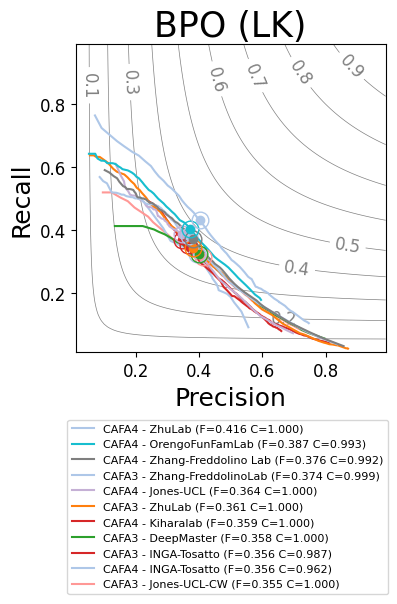

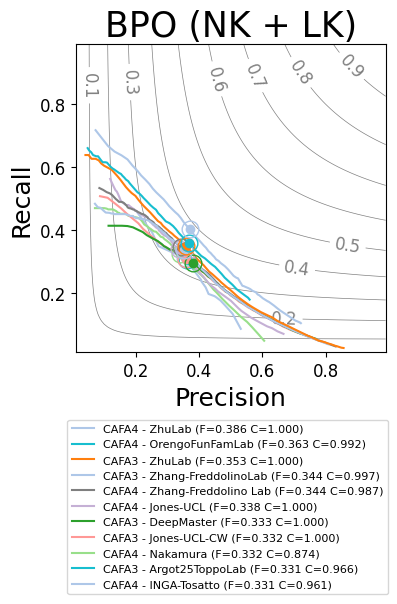

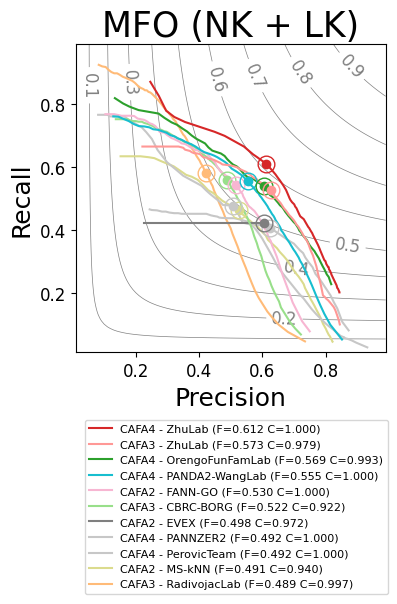

In [14]:
plots_path = eval_path+ 'combined_plots/'
plots_path_f = plots_path + 'f/'
metric, cols = ('f', ['rc', 'pr'])
register = '/data/rashika/CAFA4/head2head/collected_eval/register_combined_modified.tsv'
#create_plots_h2_h(combined_results, metric, cols, out_path = plots_path_f, n_curves = 10, names_file =register)

plots_path_f_micro = plots_path + 'f_micro/'
metric, cols =  ('f_micro', ['rc_micro', 'pr_micro'])
create_plots_h2_h(combined_results, metric, cols, out_path = plots_path_f_micro, n_curves = 10, names_file =register)

plots_path_s_w = plots_path + 's_w/'
metric, cols = ('s_w', ['ru_w', 'mi_w'])
#create_plots_h2_h(combined_results, metric, cols, out_path = plots_path_s_w, n_curves = 10, names_file =register, S_min_coord = S_min_coord)




In [15]:
eval_path

'/data/rashika/CAFA4/head2head/collected_eval/'